## Multiple Samples, using Rank-Order Methods
If the underlying samples are not normal, the means/centers of multiple samples are compared using a Kruskal-Wallis Test. The following example is taken from Riffenburgh's book, *Statistics in Medicine*, page 238.

### Performance of Five Different Surgical Instruments
As part of an instrument calibration, 5 disposable current-generating instruments used in surgery to stimulate (and thereby help locate) facial nerves are to be compared. Among the variables recorded is current (milliamperes). 10 readings are taken from each machine for a total of 50.

In [1]:
# Instrument 1
data1 = [2.00, 2.00, 2.01, 2.03, 2.03, 2.04, 2.07, 2.07, 2.09, 2.12]

# Instrument 2
data2 = [1.90, 1.95, 1.96, 1.97, 2.01, 2.03, 2.04, 2.06, 2.07, 2.31]

# Instrument 3
data3 = [1.95, 1.96, 1.96, 1.98, 2.00, 2.01, 2.04, 2.06, 2.07, 2.76]

# Instrument 4
data4 = [1.96, 1.98, 1.98, 2.01, 2.04, 2.06, 2.08, 2.10, 2.11, 3.02]

# Instrument 5
data5 = [1.96, 1.98, 1.98, 2.00, 2.03, 2.03, 2.06, 2.07, 2.11, 3.03]

A quick plot shows the data are clearly not normal, so that a rank method must be used.

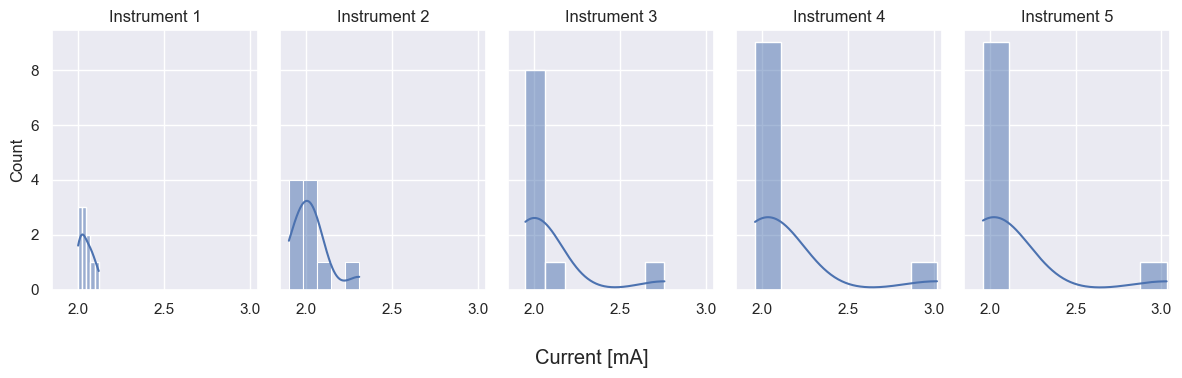

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, axs = plt.subplots(1, 5, sharey=True, sharex=True, figsize=(12.0, 3.8))

sns.histplot(data=data1, kde=True, ax=axs[0])
axs[0].set_title("Instrument 1")
axs[0].set_xlim((1.85, 3.05))
sns.histplot(data=data2, kde=True, ax=axs[1])
axs[1].set_title("Instrument 2")
sns.histplot(data=data3, kde=True, ax=axs[2])
axs[2].set_title("Instrument 3")
sns.histplot(data=data4, kde=True, ax=axs[3])
axs[3].set_title("Instrument 4")
sns.histplot(data=data5, kde=True, ax=axs[4])
axs[4].set_title("Instrument 5")

fig.supxlabel("Current [mA]")
fig.tight_layout()

We then initialize a `MeansTester` object, using the data collected from the five instruments as input arguments.

In [3]:
from means_testing import MeansTester

StatToolbox = MeansTester(data1, data2, data3, data4, data5)

We then call the `test_means()` method, which will first check for the data's distribution (i.e. is the distribution normal?), followed by the underlying variance. We will also set `verbose` to True, to have a better look of what is happening.

In [4]:
StatToolbox.test_means(verbose=True)

Checking if samples have equal variances DONE!
 - test_type : Levene
 - stat      : 0.434647883383229
 - p         : 0.7828520262022661
Samples have unequal variances: No

Checking if samples are drawn from normal distributions DONE!
Samples #1 are NOT drawn from a normal distribution: False
 - {'test_type': 'Shapiro-Wilk', 'stat': np.float64(0.9290809886030207), 'p': np.float64(0.4389138248208655)}
Samples #2 are NOT drawn from a normal distribution: True
 - {'test_type': 'Shapiro-Wilk', 'stat': np.float64(0.8246419618194569), 'p': np.float64(0.028835462223185906)}
Samples #3 are NOT drawn from a normal distribution: True
 - {'test_type': 'Shapiro-Wilk', 'stat': np.float64(0.5287113294621157), 'p': np.float64(7.90855614743129e-06)}
Samples #4 are NOT drawn from a normal distribution: True
 - {'test_type': 'Shapiro-Wilk', 'stat': np.float64(0.5246445405667501), 'p': np.float64(7.082954953958904e-06)}
Samples #5 are NOT drawn from a normal distribution: True
 - {'test_type': 'Shapiro-Wi

As one can see, the Shapiro-Wilk test was carried out on each samples, and 4 out of 5 of the samples are determined to NOT come from a normal distribution.

With that, a Kruskal-Wallis test is performed. The computed p-value is 0.527 which is far from our significant level of 0.05 and hence, we reject the null hypothesis::

> There is no significant difference in the medians of the samples, hence the five instruments exhibit no difference in performance.

To double check the computed results, refer to Riffenburgh's book, *Statistics in Medicine*, page 239.